# MVP Análise de Dados e Boas Práticas

**Nome:** Murillo Andrade

**Matrícula:** 4052025000833

**Dataset:** [Basketball Players Stats per Season - 49 Leagues](https://www.kaggle.com/datasets/jacobbaruch/basketball-players-stats-per-season-49-leagues)

# Glossário e observações

- ***BPSS*** = Nome abreviado do Dataset utilizado, Basketball Players Stats per Season - 49 Leagues.
- ***Cestas*** = Em inglês, Field Goals. Se tratam de todos os arremessos convertidos durante o jogo. Ao converter uma cesta antes da linha de 3 pontos, que é mais difícil, o arremesso converte 3 pontos para a equipe.
Quando não for especificado que são cestas de 3 pontos, o atributo se refere à todas as cestas no geral, excluindo lances livres.
- ***Lances livres*** = Em inglês, Free Throws. O jogador que sofrer uma falta enquanto ataca tem a oportunidade de fazer arremessos que valem 1 ponto cada de uma posição próxima à cesta, sem marcação adversária.
- ***Ligas*** = O mesmo jogador pode jogar diferentes ligas. Isso geralmente ocorre quando há ligas continentais: por exemplo, o jogador Yurii Kondrakov jogou em 2019 a Liga Ucraniana e também a FIBA Europe Cup.
- ***Limitações*** = o dataset não possui distinção de posição dos jogadores. Além disso, a qualidade defensiva dos times adversários não é levada em consideração.
- ***Temporada Regular e Mata-Mata:*** O dataset divide a temporada da NBA em temporada regular, em que os times de cada conferência (Leste e Oeste) competem para ficar no top 8 times com mais pontos, para classificarem para a temporada de mata-mata, onde os melhores times se enfrentam em jogos eliminiatórios até sobrar o campeão. O dataset discrimina os dois tipos de temporada, mas agrupei no data frame de forma que só tenha uma linha por jogador da NBA, somando as métricas caso os jogadores tenham jogado até o mata-mata.
- ***FIBA e Euroleague:*** Há duas ligas continentais diferentes na europa que possuem uma disputa de poder, mas para fins desse estudo a Euroleague se trata da liga mais prestigiada da europa.

# Descrição do Problema

A NBA se apresenta como a melhor liga de basquete no mundo, já que reune os jogadores mais talentosos, a maior estrutura e o mais alto nível de competição. Porém, existem diversas outras ligas cujas variáveis proporcionam diferentes estilos de jogo e níveis de desempenho. Entender as características de outras ligas pode ser interessante para a captação de bons jogadores.

O conjunto de dados "Basketball Players Stats per Season - 49 Leagues" é um conjunto de dados multivariado com diferentes estatísticas para jogadores de basquete, considerando diferentes ligas, etapas e temporadas. O objetivo do trabalho é determinar as melhores ligas de acordo com métricas ofensivas, criadas a partir de colunas do dataset. O dataset está disponível no link: https://www.kaggle.com/datasets/jacobbaruch/basketball-players-stats-per-season-49-leagues

Este projeto tem como objetivo investigar o dataset de forma a entender o que as estatísticas podem dizer sobre o jogo de cada liga e qual a melhor forma de utilizar esses dados para analisar desempenho.

## Hipóteses do Problema
Hipóteses:

- A NBA apresenta melhores estatísticas do que as outras ligas?

- Jogadores que acertam mais arremessos de 3 pontos tendem a jogar mais minutos ao longo da temporada?

- Há correlação entre a eficiência de acertar cestas e acertar lances livres?


## Tipo de Problema



Este é um problema de **classificação supervisionada**, pois o objetivo central é prever a liga em que um jogador atua com base em suas métricas ofensivas. Utilizando variáveis numéricas como média de pontos por minuto, aproveitamento em arremessos de 2 e 3 pontos e de lances livres, a análise busca identificar padrões de desempenho que sejam característicos de cada liga. Dessa forma, procura-se compreender como diferentes atributos estatísticos podem distinguir contextos competitivos e estilos de jogo entre as ligas analisadas.

Ao final, transformei estatísticas brutas de desempenho ofensivo em taxas de acerto, com o objetivo de padronizar a comparação entre jogadores com diferentes volumes de tentativa.

## Seleção de Dados

O dataset original inclui dados desde a temporada 1999 - 2000. Para este projeto, além de filtrar a análise apenas para a temporada mais recente (2019 - 2020), as colunas selecionadas foram a liga de basquete, os minutos jogados na temporada e as estatísticas ofensivas que foram consideradas relevantes para o estudo.

## Atributos do Dataset

As colunas selecionadas representam estatísticas ofensivas relevantes dos jogadores, sendo elas:

- ***liga*** (Liga em que o jogador atuou (NBA, Eurocup, etc))
- ***min*** (Minutos jogados ao longo da temporada)
- ***cestas_convert*** (Número de de Cestas de campo (excluindo lances livres) convertidas)
- ***cestas_tent*** (Número de tentativas de Cestas de campo (excluindo lances livres))
- ***3pt_convert*** (Número de cestas de 3 pontos convertidas)
- ***3pt_tentativa*** (Número de tentativas de cestas de 3 pontos)
- ***lan_livres_convert*** (Número de lances livres convertidos)
- ***lan_livres_tent*** (Número de tentativas de lances livres)
- ***pts*** (Número total de pontos feito pelo jogador)

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do BPSS e da criação das métricas utilizadas.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [55]:
#URL de importação do dataset
url = "https://raw.githubusercontent.com/murilloandrade22/mvp_BPSS_40530010055_20250_01/refs/heads/main/players_stats_by_season_full_details.csv"


# Lê o arquivo utilizando as colunas informadas
dataset = pd.read_csv(url, skiprows=1, delimiter=',')

dataset.head()

,NBA,1999 - 2000,Regular_Season,Shaquille O'Neal,LAL,79,3163.0,956,1665,0,...,"Mar 6, 1972",7-1,216,325,147,United States,Robert G. Cole High School,1.1,1.2,Orlando Magic
0,NBA,1999 - 2000,Regular_Season,Vince Carter,TOR,82,3126.0,788,1696,95,...,"Jan 26, 1977",6-6,198.0,220.0,100.0,United States,Mainland High School,1.0,5.0,Golden State Warriors
1,NBA,1999 - 2000,Regular_Season,Karl Malone,UTA,82,2947.0,752,1476,2,...,"Jul 24, 1963",6-9,206.0,265.0,120.0,United States,Summerfield High School,1.0,13.0,Utah Jazz
2,NBA,1999 - 2000,Regular_Season,Allen Iverson,PHI,70,2853.0,729,1733,89,...,"Jun 7, 1975",6-0,183.0,165.0,75.0,United States,Bethel High School,1.0,1.0,Philadelphia Sixers
3,NBA,1999 - 2000,Regular_Season,Gary Payton,SEA,82,3425.0,747,1666,177,...,"Jul 23, 1968",6-4,193.0,180.0,82.0,United States,Skyline High School,1.0,2.0,Seattle SuperSonics
4,NBA,1999 - 2000,Regular_Season,Jerry Stackhouse,DET,82,3148.0,619,1447,83,...,"Nov 5, 1974",6-6,198.0,218.0,99.0,United States,Oak Hill Academy,1.0,3.0,Philadelphia Sixers


In [56]:
#quero analisar apenas a temporada mais recente, então vou colocar esse filtro
dataset_2019 = dataset[dataset.iloc[:, 1] == '2019 - 2020']

dataset_2019.head()

,NBA,1999 - 2000,Regular_Season,Shaquille O'Neal,LAL,79,3163.0,956,1665,0,...,"Mar 6, 1972",7-1,216,325,147,United States,Robert G. Cole High School,1.1,1.2,Orlando Magic
46684,Argentinian-Liga-A,2019 - 2020,International,Kelsey Barlow,HISP,27,789.4,179,414,68,...,"Feb 14, 1991",6-5,196.0,200.0,91.0,United States,Cathedral High School,NaN,NaN,NaN
46685,Argentinian-Liga-A,2019 - 2020,International,Anthony Young,FOR,25,806.6,160,329,51,...,"Dec 10, 1989",6-7,201.0,255.0,116.0,United States,Arsenal Technical High School,NaN,NaN,NaN
46686,Argentinian-Liga-A,2019 - 2020,International,Pedro Barral,CAOS,25,759.8,153,331,33,...,"Oct 20, 1994",6-1,185.0,175.0,79.0,Argentina,NaN,NaN,NaN,NaN
46687,Argentinian-Liga-A,2019 - 2020,International,Federico Mariani,ARG,24,856.3,120,277,44,...,"Apr 14, 1992",6-3,191.0,NaN,NaN,Argentina,NaN,NaN,NaN,NaN
46688,Argentinian-Liga-A,2019 - 2020,International,Caio De Souza Pacheco,WBE,21,582.7,134,296,30,...,"Feb 22, 1999",6-2,188.0,190.0,86.0,Brazil,NaN,NaN,NaN,NaN


In [57]:
#filtrando apenas as colunas que vou utilizar
filtrando_colunas = dataset_2019.iloc[:, [0, 3, 6, 7, 8, 9, 10, 11, 12, 21]]

colunas = ['liga', 'jog', 'min', 'cestas_convert', 'cestas_tent', '3pt_convert','3pt_tentativa','lan_livres_convert','lan_livres_tent', 'pts']

filtrando_colunas.columns = colunas

#com o filtro da temporada, o index precisa ser resetado para voltar ao início, a primeira linha estava como 46684
filtrando_colunas = filtrando_colunas.reset_index(drop=True)

##como o dataset diferencia a temporada regular do mata-mata, vou agrupar os resultados na mesma linha
##soma os valores numéricos se a liga e o jogador forem os mesmos
df_agrupar = filtrando_colunas.groupby(['liga', 'jog'], as_index=False).sum()


df_agrupar.head()

,liga,jog,min,cestas_convert,cestas_tent,3pt_convert,3pt_tentativa,lan_livres_convert,lan_livres_tent,pts
0,Argentinian-Liga-A,Adonys Henriquez,595.4,121,251,52,112,41,49,335
1,Argentinian-Liga-A,Adrian Boccia,704.6,130,248,28,72,37,64,325
2,Argentinian-Liga-A,Adriano Alves,234.0,28,53,0,0,36,54,92
3,Argentinian-Liga-A,Agustin Barreiro,535.5,76,188,19,75,30,47,201
4,Argentinian-Liga-A,Agustin Caffaro,186.6,32,74,1,8,20,28,85


In [58]:
#tirando a coluna de jogador, já que vamos avaliar os desempenhos das atuações pelas ligas
df = df_agrupar.iloc[:, [0, 2, 3, 4, 5, 6, 7, 8, 9]]

# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset BPSS, visamos entender as dimensões, a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

In [59]:
# Dimensões do dataset
print(df.shape)

(7106, 9)


O Dataset é composto de 7106 linhas e 9 colunas.

In [60]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 7106

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7106 entries, 0 to 7105
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   liga                7106 non-null   object 
 1   min                 7106 non-null   float64
 2   cestas_convert      7106 non-null   int64  
 3   cestas_tent         7106 non-null   int64  
 4   3pt_convert         7106 non-null   int64  
 5   3pt_tentativa       7106 non-null   int64  
 6   lan_livres_convert  7106 non-null   int64  
 7   lan_livres_tent     7106 non-null   int64  
 8   pts                 7106 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 499.8+ KB
None


É possível observar que nenhuma coluna possui valor nulo. O atributo liga é do tipo categórico (object), o atributo min é flutuante (float) e o restante é inteiro (int64), pois são variáveis qualitativas discretas. A memória utilizada é de 499.8 KB.

In [61]:
# Mostra as 10 primeiras linhas do dataset
df.head(10)

,liga,min,cestas_convert,cestas_tent,3pt_convert,3pt_tentativa,lan_livres_convert,lan_livres_tent,pts
0,Argentinian-Liga-A,595.4,121,251,52,112,41,49,335
1,Argentinian-Liga-A,704.6,130,248,28,72,37,64,325
2,Argentinian-Liga-A,234.0,28,53,0,0,36,54,92
3,Argentinian-Liga-A,535.5,76,188,19,75,30,47,201
4,Argentinian-Liga-A,186.6,32,74,1,8,20,28,85
5,Argentinian-Liga-A,43.4,0,4,0,4,0,0,0
6,Argentinian-Liga-A,122.2,12,25,6,13,3,6,33
7,Argentinian-Liga-A,714.6,119,242,24,91,51,65,313
8,Argentinian-Liga-A,674.2,57,149,22,73,28,37,164
9,Argentinian-Liga-A,201.4,14,52,8,39,4,6,40


Há uma linha com um jogador que atuou em apenas 43 minutos, não pontuou mas tentou 4 vezes a cesta de 3 pontos. Se trata de uma linha possível de ser tratada no pré-processamento.

In [62]:
# Mostra as 10 últimas linhas do dataset
df.tail(10)

,liga,min,cestas_convert,cestas_tent,3pt_convert,3pt_tentativa,lan_livres_convert,lan_livres_tent,pts
7096,Ukrainian-Superleague,182.4,24,54,12,35,8,8,68
7097,Ukrainian-Superleague,560.3,60,175,22,83,40,56,182
7098,Ukrainian-Superleague,267.7,49,87,0,0,35,61,133
7099,Ukrainian-Superleague,246.7,34,74,16,40,17,22,101
7100,Ukrainian-Superleague,597.1,92,252,27,87,32,47,243
7101,Ukrainian-Superleague,278.9,38,84,10,33,22,35,108
7102,Ukrainian-Superleague,81.7,5,16,4,14,1,3,15
7103,Ukrainian-Superleague,174.7,25,56,15,36,3,8,68
7104,Ukrainian-Superleague,263.6,56,108,16,40,33,41,161
7105,Ukrainian-Superleague,516.8,80,172,20,58,42,54,222


Há 2 jogadores com o mesmo número de pontos (68), mas enquanto um jogou mais minutos, tentou menos cestas mas acertou mais e perdeu menos a posse, o outro jogou menos minutos, perdeu mais a posse e os arremesos mas conseguiu chegar na mesma pontuação pelo fator do maior volume de tentativas.

In [63]:
#Verificando total de pontos de cada liga
soma_pontos_por_liga = filtrando_colunas.groupby('liga')['pts'].sum().sort_values(ascending=False)
print(soma_pontos_por_liga.head(10))

liga
NBA                   220823
Chinese-CBA            96783
Mexican-LNBP           56950
Japanese-BLeague       55065
Euroleague             39634
Argentinian-Liga-A     38713
Spanish-ACB            37207
Finnish-Korisliiga     36668
French-Jeep-Elite      34771
Brazilian-NBB          33228
Name: pts, dtype: int64


É possível observar que a liga com mais pontos registrados é a NBA, com mais do dobro de pontos do segundo lugar, a liga chinesa.

## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [64]:
# estatísticas descritivas básicas do dataset
df.describe()

,min,cestas_convert,cestas_tent,3pt_convert,3pt_tentativa,lan_livres_convert,lan_livres_tent,pts
count,7106.000000,7106.000000,7106.000000,7106.000000,7106.000000,7106.000000,7106.000000,7106.000000
mean,473.001478,72.057698,156.411343,21.064593,60.147903,33.642978,45.491134,198.848719
std,361.974661,71.997844,150.670427,25.721820,67.841527,40.778731,51.559972,199.687699
min,13.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,248.925000,29.000000,68.000000,4.000000,16.000000,10.000000,15.000000,80.000000
50%,402.450000,56.000000,123.000000,14.000000,44.000000,23.000000,33.000000,155.000000
75%,585.625000,92.000000,195.000000,29.000000,81.000000,43.000000,59.000000,252.000000
max,3104.200000,857.000000,1742.000000,338.000000,960.000000,790.000000,916.000000,2690.000000


### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [65]:
# média dos atributos numéricos do dataset
df.describe().loc['mean']

,mean
min,473.001478
cestas_convert,72.057698
cestas_tent,156.411343
3pt_convert,21.064593
3pt_tentativa,60.147903
lan_livres_convert,33.642978
lan_livres_tent,45.491134
pts,198.848719


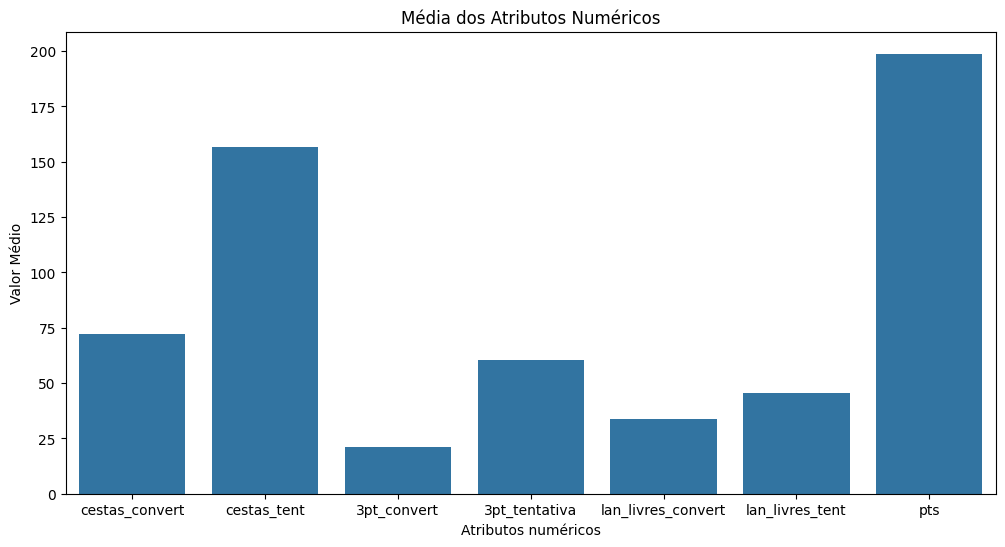

In [66]:
df_medias = df.iloc[:, 2:10]
medias = df_medias.select_dtypes(include=np.number).mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=medias.index, y=medias.values)
plt.title('Média dos Atributos Numéricos')
plt.ylabel('Valor Médio')
plt.xlabel('Atributos numéricos')
plt.show()

Por serem lances mais fáceis, a proporção entre tentativas e acertos de lances livres é a mais próxima entre as estatísticas de cestas.

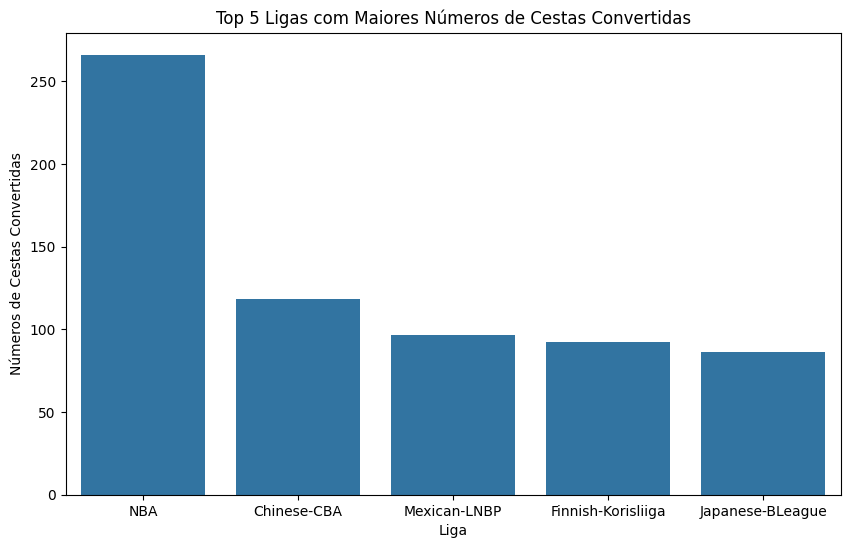

In [67]:
media_pts_por_min = df.groupby('liga')['cestas_convert'].mean().reset_index()
top5_ligas = media_pts_por_min.sort_values('cestas_convert', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(data=top5_ligas, x='liga', y='cestas_convert')

plt.title('Top 5 Ligas com Maiores Números de Cestas Convertidas')
plt.xlabel('Liga')
plt.ylabel('Números de Cestas Convertidas')
plt.show()

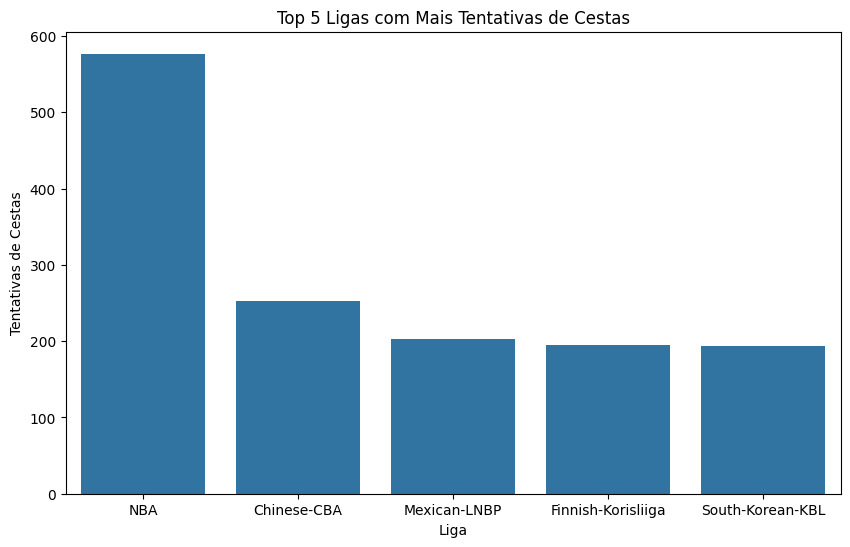

In [68]:
media_pts_por_min = df.groupby('liga')['cestas_tent'].mean().reset_index()
top5_ligas = media_pts_por_min.sort_values('cestas_tent', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(data=top5_ligas, x='liga', y='cestas_tent')

plt.title('Top 5 Ligas com Mais Tentativas de Cestas')
plt.xlabel('Liga')
plt.ylabel('Tentativas de Cestas')
plt.show()

Verificando os gráficos "Top 5 Ligas com Maiores Números de Cestas Convertidas" e "Top 5 Ligas com Mais Tentativas de Cestas", é possível perceber que a NBA possui significantemente mais tentativas de cestas do que as outras ligas, o que acarreta em maior número de acertos. A NBA provavelmente possui mais jogos do que as outras ligas, então a comparação entre valores absolutos pode não refletir a diferença de qualidade, apenas uma diferença de volume, o que foi confirmado no gráfico abaixo "Top 5 Ligas com Mais Minutos disputados".

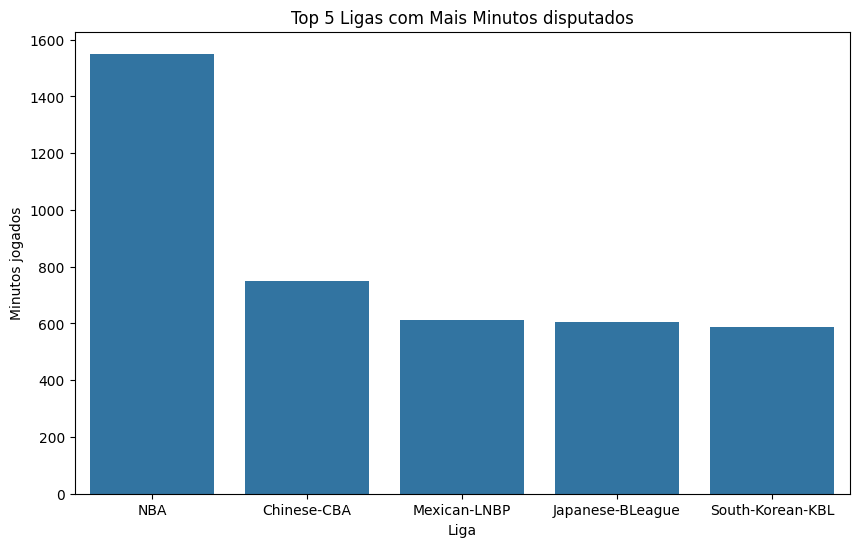

In [69]:
media_pts_por_min = df.groupby('liga')['min'].mean().reset_index()
top5_ligas = media_pts_por_min.sort_values('min', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(data=top5_ligas, x='liga', y='min')

plt.title('Top 5 Ligas com Mais Minutos disputados')
plt.xlabel('Liga')
plt.ylabel('Minutos jogados')
plt.show()

In [70]:
df_agrupar.groupby('liga')['jog'].nunique().sort_values(ascending=False).head(10)

,jog
liga,
NBA,301
Chinese-CBA,295
FIBA-Europe-Cup,242
Japanese-BLeague,238
Euroleague,236
Eurocup,229
Spanish-ACB,222
Mexican-LNBP,216
Argentinian-Liga-A,208


Utilizando o DF antes de retirar o nome dos jogadores, é possível perceber que a NBA possui o maior número de jogadores diferentes no dataset, o que pode influenciar no resultado das análises.

### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [71]:
# desvio padrão dos atributos numéricos do dataset
df.describe().loc['std']

,std
min,361.974661
cestas_convert,71.997844
cestas_tent,150.670427
3pt_convert,25.721820
3pt_tentativa,67.841527
lan_livres_convert,40.778731
lan_livres_tent,51.559972
pts,199.687699


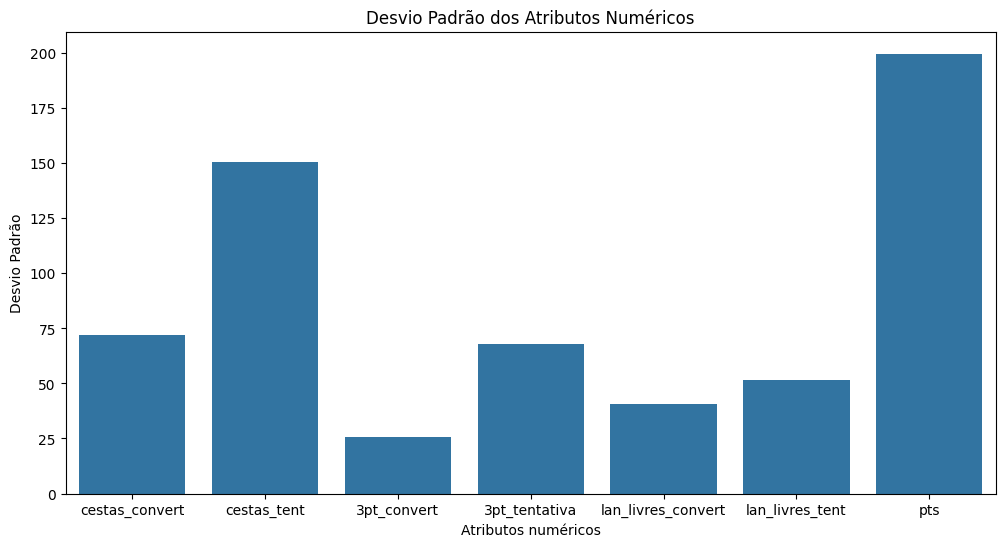

In [72]:
df_medias = df.iloc[:, 2:10]
medias = df_medias.select_dtypes(include=np.number).std()

plt.figure(figsize=(12, 6))
sns.barplot(x=medias.index, y=medias.values)
plt.title('Desvio Padrão dos Atributos Numéricos')
plt.ylabel('Desvio Padrão')
plt.xlabel('Atributos numéricos')
plt.show()

O gráfico sugere grande heterogeneidade no desempenho dos jogadores, especialmente no que diz respeito à pontuação e ao volume de arremessos. As variáveis pts,cestas_tent e 3pt_tentativa apresentam os maiores desvio padrão, refletindo a ampla disparidade no volume de pontos entre atletas com diferentes papéis ofensivos. Enquanto isso a métrica 3pt_convert mostra menor dispersão, sugerindo padrões de comportamento mais homogêneos nessas ações.

## Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

Criando um histograma para cada atributo do BPSS:

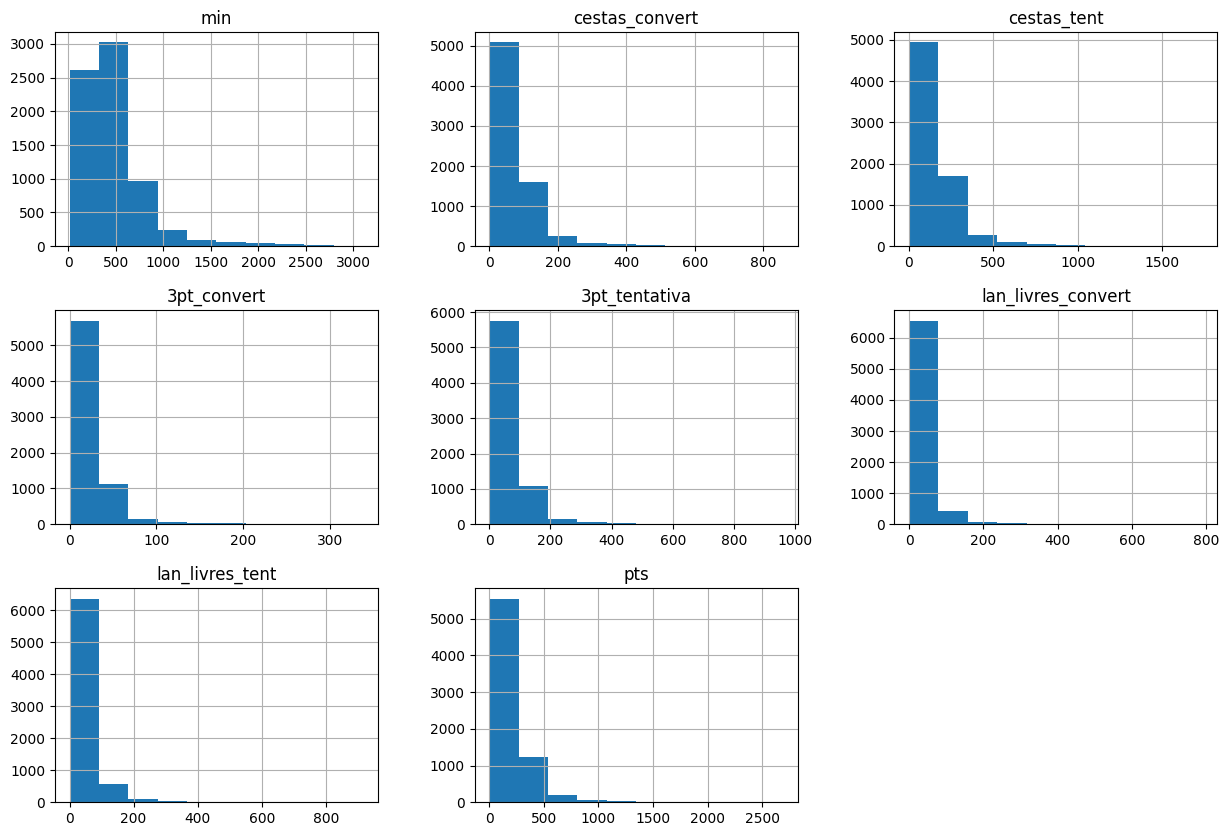

In [73]:
df.hist(figsize = (15,10))
plt.show()

Analisando os gráficos, as variáveis possuem assimetria para a direita, por conta do alto número de jogadores concentrados com menores números.
Essa concentração seguida por caudas longas traz a necessidade de normalizar ou padronizar as variáveis para reduzir o impacto de outliers e tornar as escalas comparáveis.
Vamos verificar algumas métricas para confirmar a assimetria:

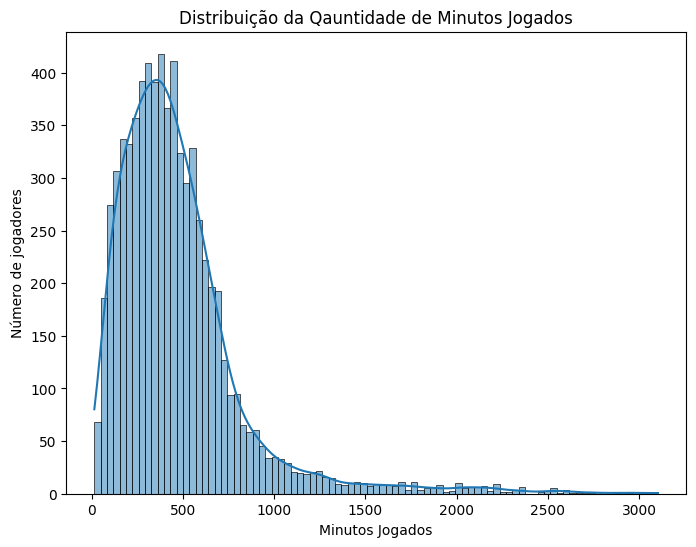

In [74]:
plt.figure(figsize=(8, 6))
# Histograma do comprimento da sépala (um dos atributos)
sns.histplot(df['min'], kde=True)
plt.title('Distribuição da Qauntidade de Minutos Jogados')
plt.xlabel('Minutos Jogados')
plt.ylabel('Número de jogadores')
plt.show()

A distribuição dos minutos jogados pelos atletas apresenta uma forte assimetria à direita, indicando que a maioria dos jogadores atua em um número relativamente reduzido de minutos ao longo da temporada. A densidade se concentra entre um pouco antes dos 500 minutos, enquanto poucos atletas ultrapassam a marca de 2000 minutos, caracterizando uma minoria com tempo de quadra elevado.

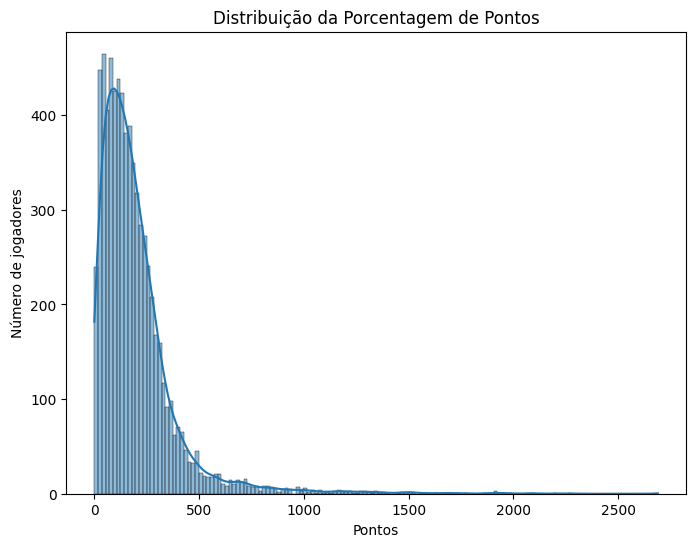

In [75]:
plt.figure(figsize=(8, 6))
# Histograma do comprimento da sépala (um dos atributos)
sns.histplot(df['pts'], kde=True)
plt.title('Distribuição da Porcentagem de Pontos')
plt.xlabel('Pontos')
plt.ylabel('Número de jogadores')
plt.show()

Já a distribuição da pontuação total dos jogadores revela um padrão de concentração em valores mais baixos, com uma longa cauda à direita. A grande maioria dos atletas marca menos de 500 pontos na temporada, o que evidencia que muitos possuem papéis ofensivos secundários ou atuam por poucos minutos.

## Boxplot


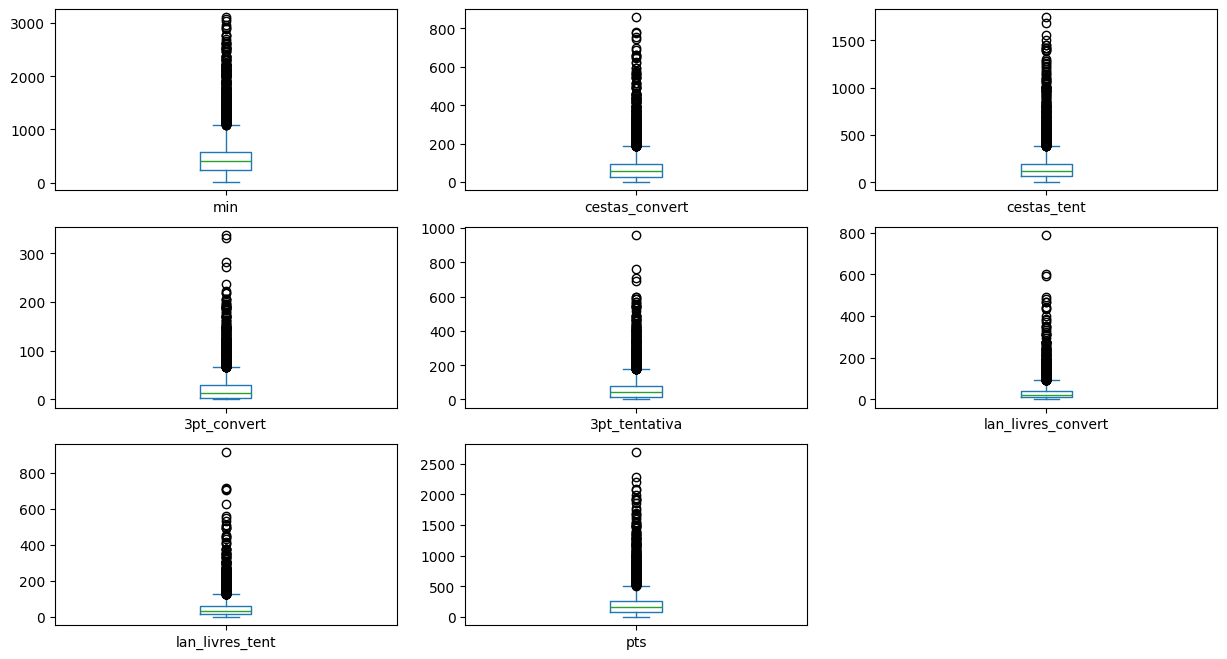

In [76]:
# Boxplot
df.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,8))
plt.show()

Semelhante aos Histogramas, os gráficos de boxplot mostram uma alta concentração nos valores baixos e uma grande presença de outliers,
com muitos jogadores apresentando valores muito acima do terceiro quartil.

## Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos das espécies podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

In [77]:
# Matriz de correlação
print("\nMatriz de Correlação:")
df.iloc[:, 1:].corr()


Matriz de Correlação:


,min,cestas_convert,cestas_tent,3pt_convert,3pt_tentativa,lan_livres_convert,lan_livres_tent,pts
min,1.000000,0.914780,0.932479,0.764236,0.789328,0.775275,0.778602,0.916420
cestas_convert,0.914780,1.000000,0.982513,0.717732,0.731961,0.873541,0.878059,0.991926
cestas_tent,0.932479,0.982513,1.000000,0.791405,0.818099,0.862623,0.856254,0.986591
3pt_convert,0.764236,0.717732,0.791405,1.000000,0.984075,0.591073,0.538875,0.767098
3pt_tentativa,0.789328,0.731961,0.818099,0.984075,1.000000,0.616539,0.568513,0.780515
lan_livres_convert,0.775275,0.873541,0.862623,0.591073,0.616539,1.000000,0.985808,0.910223
lan_livres_tent,0.778602,0.878059,0.856254,0.538875,0.568513,0.985808,1.000000,0.903859
pts,0.916420,0.991926,0.986591,0.767098,0.780515,0.910223,0.903859,1.000000


Colocando no mapa de calor:

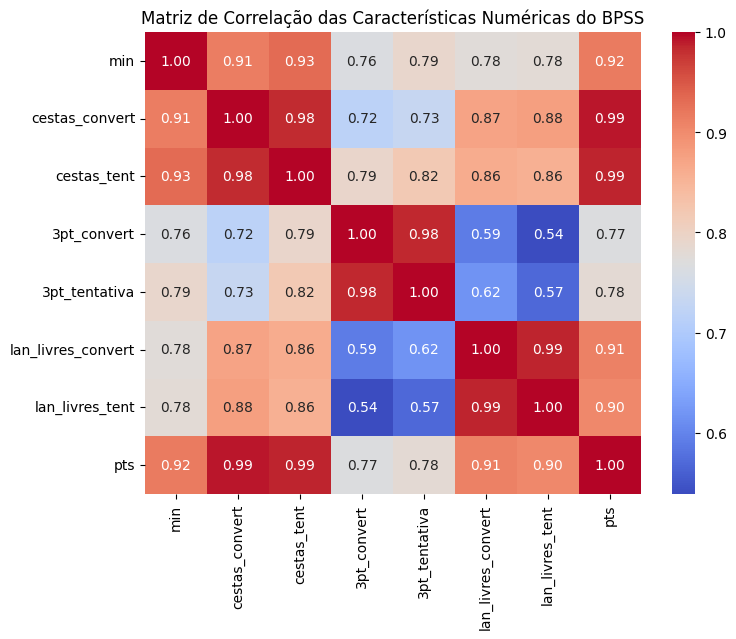

In [78]:
plt.figure(figsize=(8, 6))
# mapa de calor das variáveis numéricas
sns.heatmap(df.iloc[:, 1:].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Características Numéricas do BPSS')
plt.show()

A matriz de correlação confirma a forte influência do volume de jogo sobre as estatísticas ofensivas. A maioria das variáveis apresenta correlações elevadas entre si — principalmente as variáveis de tentativas e conversões — o que indica que os jogadores que mais participam ofensivamente tendem a acumular maiores valores em múltiplas métricas. A tendência é que quanto mais minutos um jogador atua, maior tende a ser seu número absoluto de pontos e arremessos. Isso acontece não necessariamente por ele ser mais eficiente, mas porque está mais tempo em quadra, com mais oportunidades de participar das jogadas.
Portanto, a criação de métricas proporcionais e normalizadas vai ser importante para evitar distorções na análise e garantir comparações mais justas entre atletas com diferentes níveis de tempo em quadra.

# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.
Com o objetivo de realizar comparações mais justas entre os jogadores, vou aplicar uma etapa de feature engineering para criar métricas derivadas que levem em conta a eficiência individual. Como as estatísticas brutas estão fortemente associadas ao tempo de quadra, é necessário construir variáveis que facilitem as comparações mais objetivas entre atletas com diferentes níveis de participação ao longo da temporada.

## Atributos criados por Feature engineering
- ***pts_por_min*** (Média de pontos feita a cada minuto pelo jogador na temporada)
- ***pct_cestas*** (Percentual de Cestas de campo (excluindo lances livres) convertidas)
- ***pct_3pt*** (Percentual de cestas de 3 pontos convertidas)
- ***pct_lan_livr*** (Percentual de lances livres convertidos)

## Feature engineering

In [79]:
#criando cópia do df para criar novas métricas
novo_df = df

#criando atributo de pontos por minuto
novo_df['pts_por_min'] =  novo_df['pts']/novo_df['min']

#criando atributo de percentual de acerto de cestas (excluindo lances livres)
novo_df['pct_cestas'] =  novo_df['cestas_convert']/novo_df['cestas_tent']

#criando atributo de percentual de acerto de cestas de 3 pontos
novo_df['pct_3pt'] = novo_df['3pt_convert']/novo_df['3pt_tentativa']

#criando atributo de percentual de acerto de lances livres
novo_df['pct_lan_livr'] =  novo_df['lan_livres_convert']/novo_df['lan_livres_tent']

In [80]:
#vou deixar a métrica de minutos para verificar correlações
print("\nPrimeiras 5 linhas do DF com novas métricas:")
novo_df = novo_df.iloc[:, [0, 1, 9, 10, 11, 12]]
novo_df.head()


Primeiras 5 linhas do DF com novas métricas:


,liga,min,pts_por_min,pct_cestas,pct_3pt,pct_lan_livr
0,Argentinian-Liga-A,595.4,0.562647,0.482072,0.464286,0.836735
1,Argentinian-Liga-A,704.6,0.461255,0.524194,0.388889,0.578125
2,Argentinian-Liga-A,234.0,0.393162,0.528302,NaN,0.666667
3,Argentinian-Liga-A,535.5,0.375350,0.404255,0.253333,0.638298
4,Argentinian-Liga-A,186.6,0.455520,0.432432,0.125000,0.714286


Verificando as primeiras 5 linhas, é possível perceber um valor nulo, provavelmente porque o jogador em questão não tentou cestas de 3 pontos.

In [81]:
novo_df.describe()

,min,pts_por_min,pct_cestas,pct_3pt,pct_lan_livr
count,7106.000000,7106.000000,7106.000000,6715.000000,6987.000000
mean,473.001478,0.387039,0.448772,0.316129,0.716731
std,361.974661,0.132717,0.094777,0.128836,0.153363
min,13.000000,0.000000,0.000000,0.000000,0.000000
25%,248.925000,0.292662,0.391351,0.260870,0.636766
50%,402.450000,0.384832,0.445230,0.333333,0.740741
75%,585.625000,0.474016,0.502668,0.388889,0.818182
max,3104.200000,1.023166,1.000000,1.000000,1.000000


É possível notar que as medidas de porcentagem estão normalizadas, enquanto a medida de pts_por_min não está.

## Gráficos de melhores ligas por métricas

Vamos agora observar as 5 melhores ligas de acordo com as novas métricas:

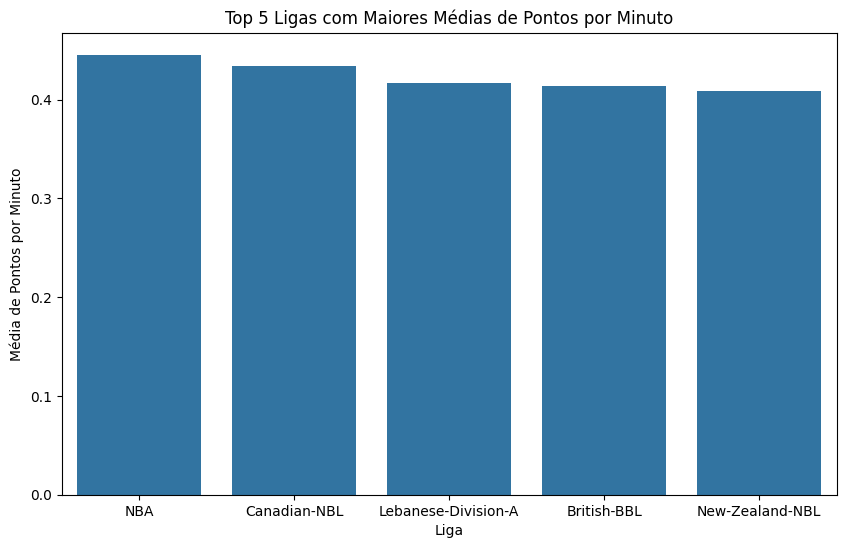

In [82]:
media_pts_por_min = novo_df.groupby('liga')['pts_por_min'].mean().reset_index()
top5_ligas = media_pts_por_min.sort_values('pts_por_min', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(data=top5_ligas, x='liga', y='pts_por_min')

plt.title('Top 5 Ligas com Maiores Médias de Pontos por Minuto')
plt.xlabel('Liga')
plt.ylabel('Média de Pontos por Minuto')
plt.show()

Apesar de ser a liga com mais minutos, a NBA de fato possui a melhor média de pontos por minutos dos jogadores, seguida pelas ligas Canadense, Libanesa, Britânica e Neozelandesa. Isso significa que em média os jogadores da NBA são os que melhor aproveitam o tempo em quadra para marcas pontos.

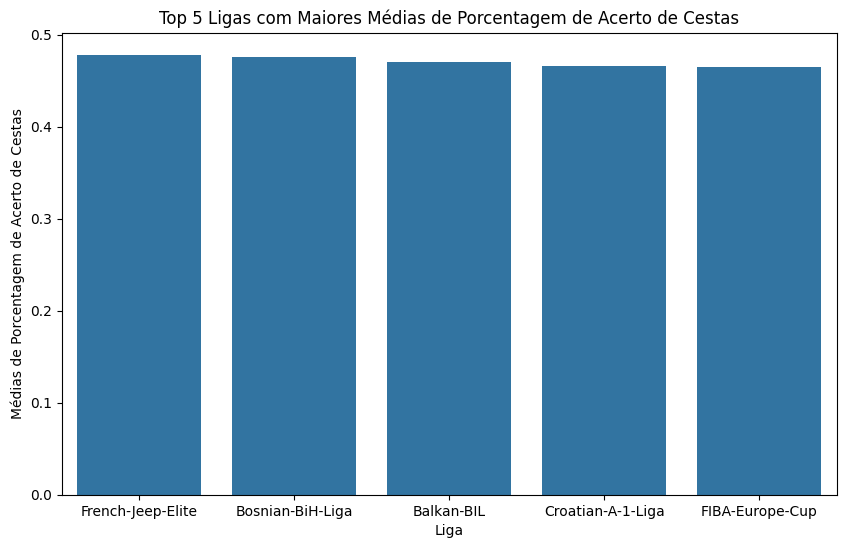

In [83]:
media_pct_cestas = novo_df.groupby('liga')['pct_cestas'].mean().reset_index()
top5_ligas = media_pct_cestas.sort_values('pct_cestas', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(data=top5_ligas, x='liga', y='pct_cestas')

plt.title('Top 5 Ligas com Maiores Médias de Porcentagem de Acerto de Cestas')
plt.xlabel('Liga')
plt.ylabel('Médias de Porcentagem de Acerto de Cestas')
plt.show()

A NBA nem aparece no top 5 de ligas com maior aproveitamento de cestas. A liga com maior aproveitamento nesse quesito é a Francesa, seguida da Bósnia, liga dos Balcãs, Crota e a Liga Continental Europeia da FIBA. Observação: em 2023 o francês Victor Wembanyama teve sua entrada na NBA como uma das mais antecipadas, sendo a primeira escolha no Draft, o principal sistema de recrutamento da liga.
Além disso, desde a temporada 2018–19 até a temporada 2023–24, os jogadores balcãs Giannis Antetokounmpo e Nikola Jokić ganharam 5 de 6 MVPs, o maior prêmio individual da NBA. Outro jogador notável é Luka Dončić.

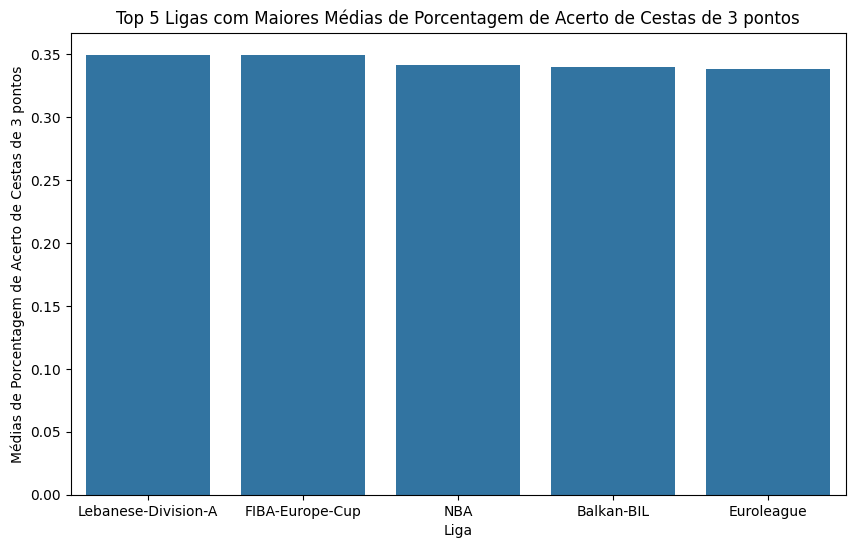

In [84]:
media_pct_3pts = novo_df.groupby('liga')['pct_3pt'].mean().reset_index()
top5_ligas = media_pct_3pts.sort_values('pct_3pt', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(data=top5_ligas, x='liga', y='pct_3pt')

plt.title('Top 5 Ligas com Maiores Médias de Porcentagem de Acerto de Cestas de 3 pontos')
plt.xlabel('Liga')
plt.ylabel('Médias de Porcentagem de Acerto de Cestas de 3 pontos')
plt.show()

Sobre maior aproveitamento de cestas de 3 pontos, a liga Libanesa está no topo, seguido pela Liga Continental Europeia da FIBA, NBA, Balcã e a Euroleague. É notável que como se trata do arremesso mais difícil, as médias são consideravelmente menores do que as outras métricas.

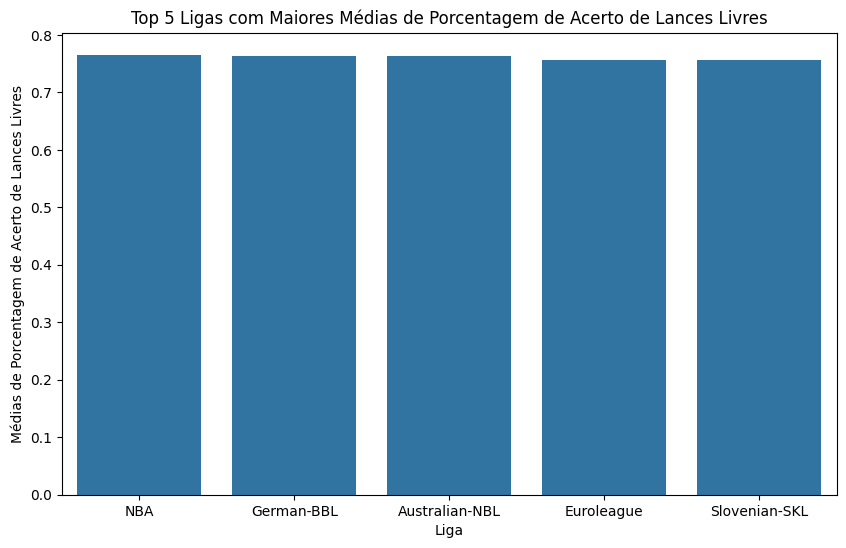

In [85]:
media_pct_lan_livr = novo_df.groupby('liga')['pct_lan_livr'].mean().reset_index()
top5_ligas = media_pct_lan_livr.sort_values('pct_lan_livr', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(data=top5_ligas, x='liga', y='pct_lan_livr')

plt.title('Top 5 Ligas com Maiores Médias de Porcentagem de Acerto de Lances Livres')
plt.xlabel('Liga')
plt.ylabel('Médias de Porcentagem de Acerto de Lances Livres')
plt.show()

Já os arremesos livres são os arremessos mais fáceis, e a liga que lidera o fundamento é a NBA, seguida pelas ligas Alemã, Australiana, Euroleague e Eslovena.

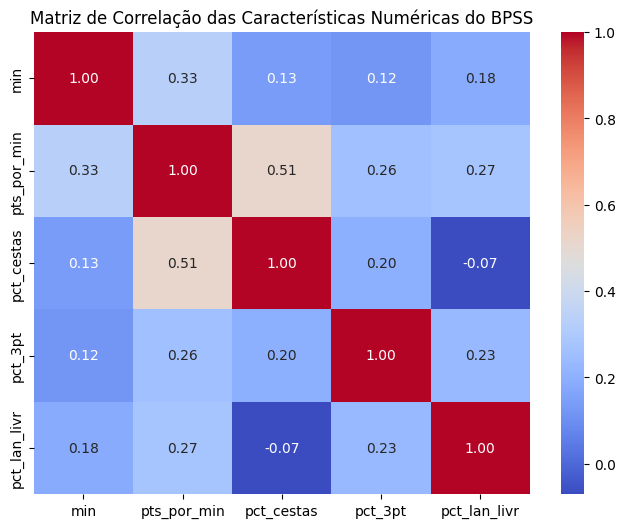

In [86]:
plt.figure(figsize=(8, 6))
# mapa de calor das variáveis numéricas
sns.heatmap(novo_df.iloc[:, 1:].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Características Numéricas do BPSS')
plt.show()

A única correlação possível de visualizar é a correlação moderada de pontos por minutos com porcentagem de acertos de cestas, indicando que jogadores que acertam mais arremessos em geral tendem a fazer mais pontos por minuto, apesar de não ser uma correlação tão alta. No restante as métricas possuem fracas correlações ou nula, no caso de porcentagem de cestas com lances livres.
É possível verificar também que não há correlação entre a porcentagem de acerto de lances de 3 com a minutagem dos jogadores.

In [87]:
# tirando minutos
novo_df = novo_df.iloc[:, [0, 1, 2, 3, 4, 5]]

# Separar features (X) e target (y)
X = novo_df.drop('liga', axis=1)
y = novo_df['liga']

In [88]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [89]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (4974, 5)
Dimensões de X_test: (2132, 5)
Dimensões de y_train: (4974,)
Dimensões de y_test: (2132,)


## Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.



In [90]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

In [91]:
# Aprende min e max APENAS de X_train
scaler_norm.fit(X_train)
X_train_normalized = scaler_norm.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_normalized = scaler_norm.transform(X_test)

In [92]:
# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
df_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)

In [93]:
print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(df_normalized.head())


Primeiras 5 linhas dos dados normalizados (treino):
        min  pts_por_min  pct_cestas   pct_3pt  pct_lan_livr
0  0.053571     0.317395    0.413793  0.285714      1.000000
1  0.347794     0.290127    0.395683  0.368421      0.740741
2  0.200569     0.423059    0.409639  0.298077      0.847826
3  0.167961     0.609701    0.386179  0.373134      0.910891
4  0.170160     0.504092    0.502415  0.319149      0.647059


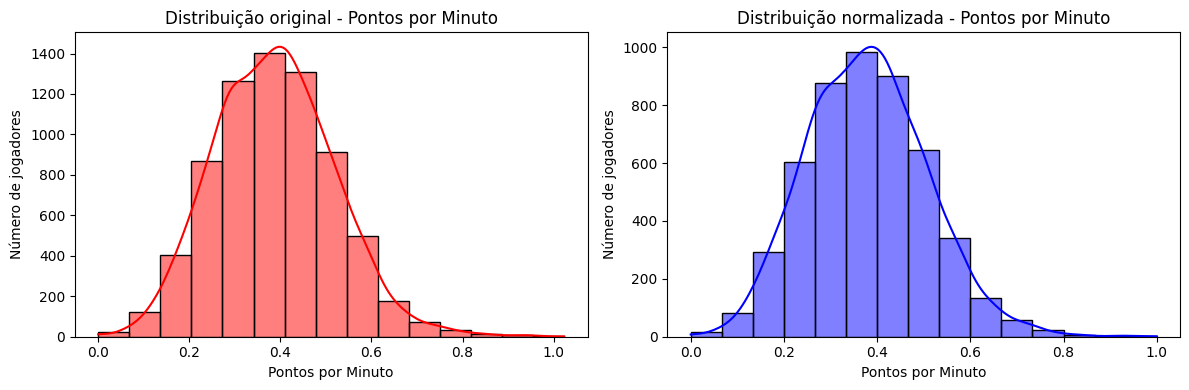

In [94]:
#Dados originais
min_original = novo_df['pts_por_min']

#Dados normalizados
min_normalizado = df_normalized['pts_por_min']

#Histograma para 'pts_por_min'
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(min_original, bins=15, color='red', kde=True)
plt.title('Distribuição original - Pontos por Minuto')
plt.xlabel('Pontos por Minuto')
plt.ylabel('Número de jogadores')

plt.subplot(1, 2, 2)
sns.histplot(min_normalizado, bins=15, color='blue', kde=True)
plt.title('Distribuição normalizada - Pontos por Minuto')
plt.xlabel('Pontos por Minuto')
plt.ylabel('Número de jogadores')

plt.tight_layout()
plt.show()

O histograma de pts_por_min após a normalização mostra que houve uma ligeira mudança na distribuição de valores logo acima de 0.4.

## Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais.

In [95]:
# Inicializar o StandardScaler
scaler_std = StandardScaler()

In [96]:
# Aprende média e desvio padrão APENAS de X_train
scaler_std.fit(X_train)
X_train_standardized = scaler_std.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_standardized = scaler_std.transform(X_test)

In [97]:
# Exibir as primeiras linhas dos dados padronizados (como DataFrame para melhor visualização)
df_standardized = pd.DataFrame(X_train_standardized, columns=X_train.columns)

In [98]:
print("\nPrimeiras 5 linhas dos dados padronizados (treino):")
print(df_standardized.head())


Primeiras 5 linhas dos dados padronizados (treino):
        min  pts_por_min  pct_cestas   pct_3pt  pct_lan_livr
0 -0.811213    -0.471042   -0.369816 -0.238579      1.856110
1  1.733889    -0.681136   -0.559581  0.407032      0.149241
2  0.460359     0.343055   -0.413350 -0.142076      0.854252
3  0.178284     1.781063   -0.659176  0.443824      1.269449
4  0.197313     0.967385    0.558826  0.022412     -0.467526


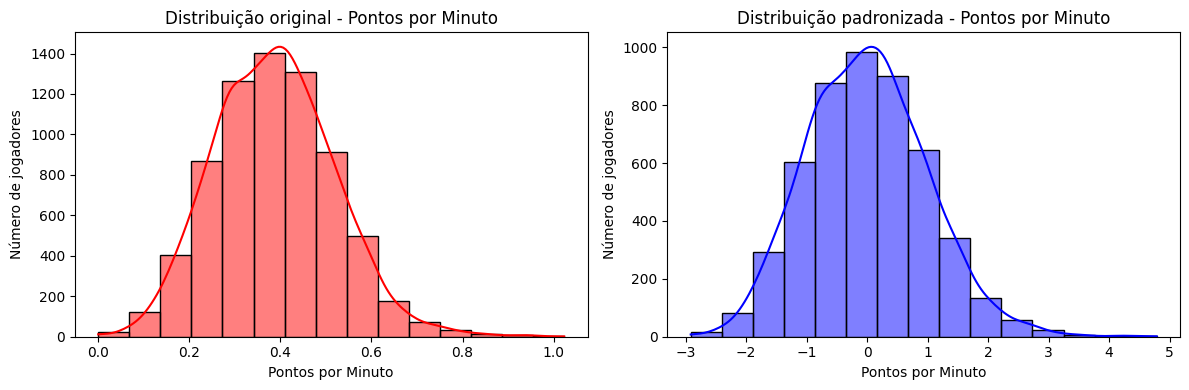

In [99]:
#Dados originais
min_original = novo_df['pts_por_min']

#Dados padronizados
min_padronizada = df_standardized['pts_por_min']

#Histograma para pts_por_min
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(min_original, bins=15, color='red', kde=True)
plt.title('Distribuição original - Pontos por Minuto')
plt.xlabel('Pontos por Minuto')
plt.ylabel('Número de jogadores')

plt.subplot(1, 2, 2)
sns.histplot(min_padronizada, bins=15, color='blue', kde=True)
plt.title('Distribuição padronizada - Pontos por Minuto')
plt.xlabel('Pontos por Minuto')
plt.ylabel('Número de jogadores')

plt.tight_layout()
plt.show()

A distribuição foi preservada, mas agora o meio se concentra no 0 enquanto as variações são positivas ou negativas.

## Tratamento de Valores Nulos

O dataset BPSS não possui valores nulos. Porém, com as métricas criadas, as métricas pct_3pt e pct_lan_livres possuem valores nulos, por causa de jogadores com baixa minutagem ou que não tentaram cestas de 3 ou lances livres. Como o estudo é sobre efetividade ofensiva, irá se beneficiar com as linhas sendo retiradas.

In [100]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset BPSS:")
novo_df.isnull().sum()

Valores nulos no dataset BPSS:


,0
liga,0
min,0
pts_por_min,0
pct_cestas,0
pct_3pt,391
pct_lan_livr,119


Retirando linhas nulas.

In [101]:
novo_df = novo_df.dropna()
print("Valores nulos no dataset BPSS:")
novo_df.isnull().sum()

Valores nulos no dataset BPSS:


,0
liga,0
min,0
pts_por_min,0
pct_cestas,0
pct_3pt,0
pct_lan_livr,0


# Conclusão

A análise e pré-processamento do BPSS demonstram a importância de entender a estrutura dos dados antes da modelagem. O dataset é limpo e balanceado, mas com a criação das novas métricas foi necessário tratar os valores nulos por causa de jogadores com baixa minutagem. A análise exploratória revelou que não há correlação entre as variáveis criadas, o que é importante para a modelagem. Como próximos passos, recomenda-se a implementação de modelos de classificação para prever a liga de um jogador com base em suas estatísticas normalizadas, o que pode auxiliar no scouting internacional de atletas.

As três hipóteses levantadas foram validadas:

1.   **A NBA apresenta melhores estatísticas do que as outras ligas?** A NBA lidera nas estatísticas de pontos por minuto e taxa de acerto de lances livres, mas não lidera nas taxas de acerto de cestas e cestas de 3 pontos. Isso pode ocorrer por vários motivos, como piores defesas ou menos jogos em outras ligas, mas a diferença de tamanho de aro, da altura da cesta e da distância da linha de 3 pontos podem ser fatores que influenciam diretamente nessas métricas.

2.   **Jogadores que acertam mais arremessos de 3 pontos tendem a jogar mais minutos ao longo da temporada?** Não necessariamente, a correlação entre o número de cestas de 3 pontos convertidas e os minutos jogados ao longo da temporada é de 0,12, o que indica uma relação muito fraca entre as variáveis.
Ou seja, embora jogadores com bom aproveitamento possam ter valor tático, isso não se reflete diretamente em mais tempo de quadra.
Com base nisso, a hipótese foi refutada.

3.   **Há correlação entre a eficiência de acertar cestas e acertar lances livres?** Não, a correlação entre as métricas relacionadas é de -0,07, indicando que não há relação linear significativa entre as duas estatísticas.



